# Tests

### Imports and data loading

In [22]:
import definitions as d
import neural_network as nn
import numpy as np
import time
import matplotlib.pyplot as plt

import tensorflow as tf
tf.get_logger().setLevel("ERROR")

from test_case_creator import (
    denormalized,
    get_sets__without_neighbors__one_prediction__without_aggregation,
    get_sets__without_neighbors__24_predictions__without_aggregation,
    get_sets__with_3_neighbors__one_prediction__without_aggregation,
    get_sets__without_neighbors__one_prediction__with_aggregation
)

In [2]:
(train_set1, test_set1, params1) = get_sets__without_neighbors__one_prediction__without_aggregation()
(train_set2, test_set2, params2) = get_sets__with_3_neighbors__one_prediction__without_aggregation()
(train_set3, test_set3, params3) = get_sets__without_neighbors__24_predictions__without_aggregation()
(train_set4, test_set4, params4) = get_sets__without_neighbors__one_prediction__with_aggregation()

## H1 - addition of 3 closest cities will increase accuracy with similar convergence, but with longer compute time

### Networks

In [12]:
def get_h1_net_1(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 400, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 80, d.relu, rng, 0.6)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.relu, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)


def get_h1_net_2(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 300, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 300, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 160, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 80, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.6)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.relu, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)


def get_h1_net_3(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    d1_n1 = nn.InputLayer(120, "d1_n1")
    d2_n1 = nn.InputLayer(120, "d2_n1")
    d3_n1 = nn.InputLayer(120, "d3_n1")
    days_n1 = nn.MergeLayer([d1_n1, d2_n1, d3_n1])

    d1_n2 = nn.InputLayer(120, "d1_n2")
    d2_n2 = nn.InputLayer(120, "d2_n2")
    d3_n2 = nn.InputLayer(120, "d3_n2")
    days_n2 = nn.MergeLayer([d1_n2, d2_n2, d3_n2])

    d1_n3 = nn.InputLayer(120, "d1_n3")
    d2_n3 = nn.InputLayer(120, "d2_n3")
    d3_n3 = nn.InputLayer(120, "d3_n3")
    days_n3 = nn.MergeLayer([d1_n3, d2_n3, d3_n3])

    days = nn.MergeLayer([days, days_n1, days_n2, days_n3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 300, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 300, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 160, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 80, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.6)
    
    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.relu, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)


def get_h1_net_4(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    d1_n1 = nn.InputLayer(120, "d1_n1")
    d2_n1 = nn.InputLayer(120, "d2_n1")
    d3_n1 = nn.InputLayer(120, "d3_n1")
    days_n1 = nn.MergeLayer([d1_n1, d2_n1, d3_n1])

    d1_n2 = nn.InputLayer(120, "d1_n2")
    d2_n2 = nn.InputLayer(120, "d2_n2")
    d3_n2 = nn.InputLayer(120, "d3_n2")
    days_n2 = nn.MergeLayer([d1_n2, d2_n2, d3_n2])

    d1_n3 = nn.InputLayer(120, "d1_n3")
    d2_n3 = nn.InputLayer(120, "d2_n3")
    d3_n3 = nn.InputLayer(120, "d3_n3")
    days_n3 = nn.MergeLayer([d1_n3, d2_n3, d3_n3])

    days = nn.MergeLayer([days, days_n1, days_n2, days_n3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 1500, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 1000, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 600, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 50, d.relu, rng, 0.6)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.relu, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)


### Tests

#### Results

Regression without neighbors:
1. 3 epochs, 33.42% / 8.11%, 9.81 s
2. 41 epochs, 45.92% / 8.54%, 161.34 s

Regression with neighbors:
1. 
2. 

Classification without neighbors:
1. 
2. 

Classification with neighbors:
1. 
2. 

In [32]:
def test(function, output, train_set, test_set, params):
    print("================================== new test ==================================")
    net = function(output == "output_temp")

    start = time.time()
    (train_losses, test_losses) = net.train(train_set, test_set, 1024, output)
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")

    if output == "output_temp":
        predicted = denormalized(net.predict(train_set), params["temperature"])
        expected = denormalized(train_set[output], params["temperature"])
        diffs = np.abs(predicted - expected)
        print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
        print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

        predicted = denormalized(net.predict(test_set), params["temperature"])
        expected = denormalized(test_set[output], params["temperature"])
        diffs = np.abs(predicted - expected)
        print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
        print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")
    else:
        predicted = net.predict(train_set)[0, :]
        expected = train_set["output_wind"][0, :]
        auc = tf.keras.metrics.AUC()
        auc.update_state(expected, predicted)
        predicted = np.rint(predicted)
        print(f"[train] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
        print(f"[train] AUC: {auc.result().numpy()}")

        predicted = net.predict(test_set)[0, :]
        expected = test_set["output_wind"][0, :]
        auc = tf.keras.metrics.AUC()
        auc.update_state(expected, predicted)
        predicted = np.rint(predicted)
        print(f"[test] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
        print(f"[test] AUC: {auc.result().numpy()}")

    ax = plt.figure().gca()
    ax.plot(range(1, len(train_losses) + 1), train_losses, "-o")
    ax.plot(range(1, len(test_losses) + 1), test_losses, "-o")
    ax.xaxis.set_label("epoch")
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.yaxis.set_label("loss")
    ax.set_yscale("log")
    ax.legend(["train", "test"])

================================== new test ==================================
Epoch 1: train: 29.081665711605265, test: 0.021977472462525408
Epoch 2: train: 0.009219952659705814, test: 0.02219257427423117
Epoch 3: train: 0.004286008995670596, test: 0.03334160737687922
Epoch 4: train: 0.0027481771978749773, test: 0.04541172289030951
Time elapsed:  8.61 s
[train] min: 0.000414333568528491, max: 26.583954216054735, mean: 3.464867961786196, median: 2.995202650943554
[train] Good predictions: 15266, bad predictions: 30417, success rate:  33.42%
[test] min: 0.002131273011684698, max: 56.756500984027156, mean: 13.604243604805106, median: 11.857314848322233
[test] Good predictions: 1007, bad predictions: 11404, success rate:  8.11%


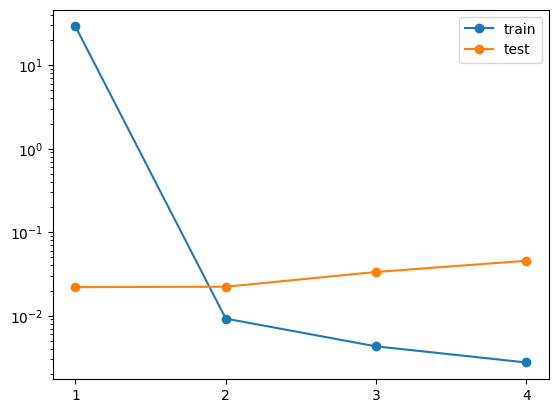

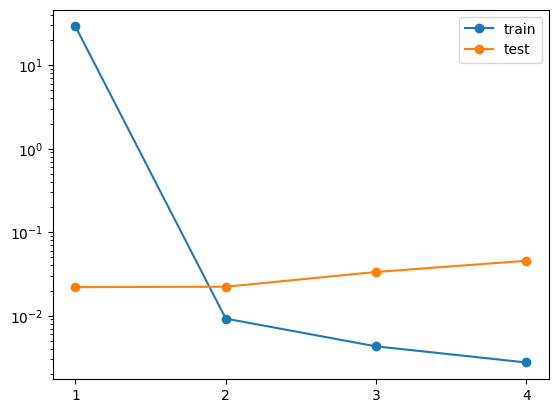

In [33]:
test(get_h1_net_1, "output_temp", train_set1, test_set1, params1)
test(get_h1_net_2, "output_temp", train_set1, test_set1, params1)
test(get_h1_net_3, "output_temp", train_set2, test_set2, params2)
test(get_h1_net_4, "output_temp", train_set2, test_set2, params2)

test(get_h1_net_1, "output_wind", train_set1, test_set1, params1)
test(get_h1_net_2, "output_wind", train_set1, test_set1, params1)
test(get_h1_net_3, "output_wind", train_set2, test_set2, params2)
test(get_h1_net_4, "output_wind", train_set2, test_set2, params2)

## H2 - mean from 24 predictions will be better for architectures with little number of weights, whereas 1 prediction will be better when many weights

### Networks

In [ ]:
def get_h2_net_1(output_size):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 50, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, output_size, d.linear, rng, 1)

    return nn.NeuralNetwork(output, d.l2_loss, rng)


def get_h2_net_2(output_size):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 300, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 300, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 160, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 80, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, output_size, d.linear, rng, 1)

    return nn.NeuralNetwork(output, d.l2_loss, rng)

### Tests

#### Results

1 prediction:
1. 
2. 

24 predictions:
1. 
2. 

In [ ]:
def test(function, output_size, train_set, test_set, params):
    print("================================== new test ==================================")
    net = function(output_size)

    start = time.time()
    net.train(train_set, test_set, 1024, "output_temp")
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")

    predicted = np.mean(denormalized(net.predict(train_set), params["temperature"]), axis=0)
    expected = np.mean(denormalized(train_set["output_temp"], params["temperature"]), axis=0)
    diffs = np.abs(predicted - expected)
    print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

    predicted = np.mean(denormalized(net.predict(test_set), params["temperature"]), axis=0)
    expected = np.mean(denormalized(test_set["output_temp"], params["temperature"]), axis=0)
    diffs = np.abs(predicted - expected)
    print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

In [ ]:
test(get_h2_net_1, 1, train_set1, test_set1, params1)
test(get_h2_net_2, 1, train_set1, test_set1, params1)
test(get_h2_net_1, 24, train_set3, test_set3, params3)
test(get_h2_net_2, 24, train_set3, test_set3, params3)

## H3 - L2 grants faster convergence than L1

### Networks

In [ ]:
def get_h3_net_1(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

def get_h3_net_2(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.sigmoid, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.sigmoid, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.sigmoid, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

def get_h3_net_3(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 360, d.relu, rng, 0.8)
    days = nn.FullConnectLayer(days, 200, d.relu, rng, 0.8)

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

def get_h3_net_4(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 360, d.sigmoid, rng, 0.8)
    days = nn.FullConnectLayer(days, 200, d.sigmoid, rng, 0.8)

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 200, d.sigmoid, rng, 0.8)
    output = nn.FullConnectLayer(output, 100, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.sigmoid, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

### Tests

#### Results

L1:
1. 26 epochs, 55.16% / 11.34%, 302.85 s
2. 6 epochs, 15.73% / 15.23%, 94.07 s
3. 19 epochs, 44.79% / 7.32%, 132.44 s
4. 6 epochs, 42.57% /6.37%, 52.23 s

L2:
1. 6 epochs, 52.48% / 7.49%, 66.24 s
2. 39 epochs, 15.28% / 15.01%, 633.67 s
3. 4 epochs, 28.33% / 7.64%, 23.25%
4. 8 epochs, 38.05% / 8.22%, 65.50 s

In [ ]:
def test(function, loss, train_set, test_set, params):
    print("================================== new test ==================================")
    net = function(loss)

    start = time.time()
    net.train(train_set, test_set, 1024, "output_temp")
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")

    predicted = denormalized(net.predict(train_set), params["temperature"])
    expected = denormalized(train_set["output_temp"], params["temperature"])
    diffs = np.abs(predicted - expected)
    print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

    predicted = denormalized(net.predict(test_set), params["temperature"])
    expected = denormalized(test_set["output_temp"], params["temperature"])
    diffs = np.abs(predicted - expected)
    print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

In [ ]:
# test(get_h3_net_1, d.l1_loss, train_set1, test_set1, params1)
# test(get_h3_net_2, d.l1_loss, train_set1, test_set1, params1)
# test(get_h3_net_3, d.l1_loss, train_set1, test_set1, params1)
# test(get_h3_net_4, d.l1_loss, train_set1, test_set1, params1)

# test(get_h3_net_1, d.l2_loss, train_set1, test_set1, params1)
# test(get_h3_net_2, d.l2_loss, train_set1, test_set1, params1)
# test(get_h3_net_3, d.l2_loss, train_set1, test_set1, params1)
test(get_h3_net_4, d.l2_loss, train_set1, test_set1, params1)

## H4 - cross-entropy and hinge will not differ in terms of convergence

### Networks

In [ ]:
def get_h4_net_1(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 2, d.relu, rng, 1)
    output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

def get_h4_net_2(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.sigmoid, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.sigmoid, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.sigmoid, rng, 0.5)
    output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
    output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

def get_h4_net_3(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 360, d.relu, rng, 0.8)
    days = nn.FullConnectLayer(days, 200, d.relu, rng, 0.8)

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 2, d.relu, rng, 1)
    output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

def get_h4_net_4(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 360, d.sigmoid, rng, 0.8)
    days = nn.FullConnectLayer(days, 200, d.sigmoid, rng, 0.8)

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 200, d.sigmoid, rng, 0.8)
    output = nn.FullConnectLayer(output, 100, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.sigmoid, rng, 0.5)
    output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
    output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

### Tests

In [ ]:
#### Results

In [ ]:
def test(function, loss, train_set, test_set, params):
    print("================================== new test ==================================")
    net = function(loss)

    start = time.time()
    net.train(train_set, test_set, 1024, "output_temp")
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")
    
    predicted = net.predict(train_set)[0, :]
    expected = train_set["output_wind"][0, :]
    auc = tf.keras.metrics.AUC()
    auc.update_state(expected, predicted)
    predicted = np.rint(predicted)
    print(f"[train] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
    print(f"[train] AUC: {auc.result().numpy()}")

    predicted = net.predict(test_set)[0, :]
    expected = test_set["output_wind"][0, :]
    auc = tf.keras.metrics.AUC()
    auc.update_state(expected, predicted)
    predicted = np.rint(predicted)
    print(f"[test] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
    print(f"[test] AUC: {auc.result().numpy()}")

In [ ]:
test(get_h4_net_1, d.cross_entropy_loss, train_set1, test_set1, params1)
test(get_h4_net_2, d.cross_entropy_loss, train_set1, test_set1, params1)
test(get_h4_net_3, d.cross_entropy_loss, train_set1, test_set1, params1)
test(get_h4_net_4, d.cross_entropy_loss, train_set1, test_set1, params1)

test(get_h4_net_1, d.hinge_loss, train_set1, test_set1, params1)
test(get_h4_net_2, d.hinge_loss, train_set1, test_set1, params1)
test(get_h4_net_3, d.hinge_loss, train_set1, test_set1, params1)
test(get_h4_net_4, d.hinge_loss, train_set1, test_set1, params1)

#### Test results

## H5 - the more shared weights in network, the smaller difference between accuracy on train and test set

### Networks

In [64]:
def get_h5_net_1():
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d1 = nn.FullConnectLayer(d1, 120, d.relu, rng, 0.8)
    d2 = nn.InputLayer(120, "d2")
    d2 = nn.FullConnectLayer(d2, 120, d.relu, rng, 0.8)
    d3 = nn.InputLayer(120, "d3")
    d3 = nn.FullConnectLayer(d3, 120, d.relu, rng, 0.8)
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, d.l2_loss, rng)


def get_h5_net_2():
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d1 = nn.FullConnectLayer(d1, 120, d.relu, rng, 0.8)
    d2 = nn.InputLayer(120, "d2")
    d2 = nn.FullConnectLayer(d2, 120, d.relu, rng, 0.8, d1)
    d3 = nn.InputLayer(120, "d3")
    d3 = nn.FullConnectLayer(d3, 120, d.relu, rng, 0.8, d1)
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, d.l2_loss, rng)


def get_h5_net_3():
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d1 = nn.FullConnectLayer(d1, 120, d.relu, rng, 0.8)
    d2 = nn.InputLayer(120, "d2")
    d2 = nn.FullConnectLayer(d2, 120, d.relu, rng, 0.8, d1)
    d3 = nn.InputLayer(120, "d3")
    d3 = nn.FullConnectLayer(d3, 120, d.relu, rng, 0.8, d1)
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 360, d.relu, rng, 0.7)

    d1_n1 = nn.InputLayer(120, "d1_n1")
    d1_n1 = nn.FullConnectLayer(d1_n1, 120, d.relu, rng, 0.8, d1)
    d2_n1 = nn.InputLayer(120, "d2_n1")
    d2_n1 = nn.FullConnectLayer(d2_n1, 120, d.relu, rng, 0.8, d2)
    d3_n1 = nn.InputLayer(120, "d3_n1")
    d3_n1 = nn.FullConnectLayer(d3_n1, 120, d.relu, rng, 0.8, d3)
    days_n1 = nn.MergeLayer([d1_n1, d2_n1, d3_n1])
    days_n1 = nn.FullConnectLayer(days_n1, 360, d.relu, rng, 0.7, days)

    d1_n2 = nn.InputLayer(120, "d1_n2")
    d1_n2 = nn.FullConnectLayer(d1_n2, 120, d.relu, rng, 0.8, d1)
    d2_n2 = nn.InputLayer(120, "d2_n2")
    d2_n2 = nn.FullConnectLayer(d2_n2, 120, d.relu, rng, 0.8, d2)
    d3_n2 = nn.InputLayer(120, "d3_n2")
    d3_n2 = nn.FullConnectLayer(d3_n2, 120, d.relu, rng, 0.8, d3)
    days_n2 = nn.MergeLayer([d1_n2, d2_n2, d3_n2])
    days_n2 = nn.FullConnectLayer(days_n2, 360, d.relu, rng, 0.7, days)

    d1_n3 = nn.InputLayer(120, "d1_n3")
    d1_n3 = nn.FullConnectLayer(d1_n3, 120, d.relu, rng, 0.8, d1)
    d2_n3 = nn.InputLayer(120, "d2_n3")
    d2_n3 = nn.FullConnectLayer(d2_n3, 120, d.relu, rng, 0.8, d2)
    d3_n3 = nn.InputLayer(120, "d3_n3")
    d3_n3 = nn.FullConnectLayer(d3_n3, 120, d.relu, rng, 0.8, d3)
    days_n3 = nn.MergeLayer([d1_n3, d2_n3, d3_n3])
    days_n3 = nn.FullConnectLayer(days_n3, 360, d.relu, rng, 0.7, days)

    days = nn.MergeLayer([days, days_n1, days_n2, days_n3])

    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([coords, city_one_hot])
    city = nn.FullConnectLayer(city, 38, d.relu, rng, 0.8)

    coords_n1 = nn.InputLayer(2, "coords_n1")
    city_one_hot_n1 = nn.InputLayer(36, "city_one_hot_n1")
    city_n1 = nn.MergeLayer([coords, city_one_hot])
    city_n1 = nn.FullConnectLayer(city_n1, 38, d.relu, rng, 0.8, city)

    coords_n2 = nn.InputLayer(2, "coords_n2")
    city_one_hot_n2 = nn.InputLayer(36, "city_one_hot_n2")
    city_n2 = nn.MergeLayer([coords, city_one_hot])
    city_n2 = nn.FullConnectLayer(city_n2, 38, d.relu, rng, 0.8, city)

    coords_n3 = nn.InputLayer(2, "coords_n3")
    city_one_hot_n3 = nn.InputLayer(36, "city_one_hot_n3")
    city_n3 = nn.MergeLayer([coords, city_one_hot])
    city_n3 = nn.FullConnectLayer(city_n3, 38, d.relu, rng, 0.8, city)

    cities = nn.MergeLayer([city, city_n1, city_n2, city_n3])
    
    date = nn.InputLayer(1, "date")

    output = nn.MergeLayer([days, cities, date])
    output = nn.FullConnectLayer(output, 1500, d.relu, rng, 0.7)
    output = nn.FullConnectLayer(output, 1000, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 600, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 50, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 0.5)

    return nn.NeuralNetwork(output, d.l2_loss, rng)

### Tests

#### Results

In [65]:
def test(function, train_set, test_set, params):
    print("================================== new test ==================================")
    net = function()

    start = time.time()
    # net.train(train_set, test_set, 1024, "output_temp")
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")

    predicted = denormalized(net.predict(train_set), params["temperature"])
    expected = denormalized(train_set["output_temp"], params["temperature"])
    diffs = np.abs(predicted - expected)
    print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

    predicted = denormalized(net.predict(test_set), params["temperature"])
    expected = denormalized(test_set["output_temp"], params["temperature"])
    diffs = np.abs(predicted - expected)
    print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

In [66]:
test(get_h5_net_1, train_set1, test_set1, params1)
test(get_h5_net_2, train_set1, test_set1, params1)
test(get_h5_net_3, train_set2, test_set2, params2)

================================== new test ==================================
Time elapsed:  0.00 s
[train] min: 24.04787014057075, max: 93.96597068277427, mean: 65.47355198777538, median: 66.73569687932687
[train] Good predictions: 0, bad predictions: 45683, success rate:  0.00%
[test] min: 23.774509221220114, max: 89.44020466536219, mean: 64.91547137396374, median: 66.25723278804026
[test] Good predictions: 0, bad predictions: 12411, success rate:  0.00%
================================== new test ==================================
Time elapsed:  0.00 s
[train] min: 9.975554843898749, max: 79.97972542961682, mean: 53.67048761016801, median: 54.94600622241154
[train] Good predictions: 0, bad predictions: 45683, success rate:  0.00%
[test] min: 11.633948576550353, max: 74.69790989619102, mean: 53.55534263504296, median: 54.68058427922551
[test] Good predictions: 0, bad predictions: 12411, success rate:  0.00%
================================== new test ================================

: 

: 

## H6 - classification will have better accuracy using ReLUs, while regression will have better accuracy using sigmoids

### Networks

In [1]:
def get_h6_net_1(activation):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, activation, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, activation, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, activation, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, activation, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, activation, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, activation, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, d.l2_loss, rng)


def get_h6_net_2(activation):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, activation, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, activation, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, activation, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, activation, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, activation, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, activation, rng, 0.5)
    output = nn.FullConnectLayer(output, 2, activation, rng, 1)
    output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)

    return nn.NeuralNetwork(output, d.hinge_loss, rng)

### Tests

#### Results

In [ ]:
def test(function, activation, train_set, test_set, params):
    print("================================== new test ==================================")
    net = function(activation)

    start = time.time()
    net.train(train_set, test_set, 1024, "output_temp")
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")

    predicted = denormalized(net.predict(train_set), params["temperature"])
    expected = denormalized(train_set["output_temp"], params["temperature"])
    diffs = np.abs(predicted - expected)
    print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

    predicted = denormalized(net.predict(test_set), params["temperature"])
    expected = denormalized(test_set["output_temp"], params["temperature"])
    diffs = np.abs(predicted - expected)
    print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

In [ ]:
test(get_h6_net_1, d.relu, train_set1, test_set1, params1)
test(get_h6_net_1, d.sigmoid, train_set1, test_set1, params1)
test(get_h6_net_2, d.relu, train_set1, test_set1, params1)
test(get_h6_net_2, d.sigmoid, train_set1, test_set1, params1)

## H7 - aggregation will grant similar results with less computations needed

### Networks

In [ ]:
def get_h7_net_1():
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, d.l2_loss, rng)


def get_h7_net_2():
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(40, "d1")
    d2 = nn.InputLayer(40, "d2")
    d3 = nn.InputLayer(40, "d3")
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 360, d.relu, rng, 0.8)
    days = nn.FullConnectLayer(days, 200, d.relu, rng, 0.8)

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, d.l2_loss, rng)


def get_h7_net_3():
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(40, "d1")
    d2 = nn.InputLayer(40, "d2")
    d3 = nn.InputLayer(40, "d3")
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 120, d.relu, rng, 0.8)
    days = nn.FullConnectLayer(days, 100, d.relu, rng, 0.8)

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, d.l2_loss, rng)

### Tests

#### Results

In [ ]:
def test(function, train_set, test_set, params):
    print("================================== new test ==================================")
    net = function()

    start = time.time()
    net.train(train_set, test_set, 1024, "output_temp")
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")

    predicted = denormalized(net.predict(train_set), params["temperature"])
    expected = denormalized(train_set["output_temp"], params["temperature"])
    diffs = np.abs(predicted - expected)
    print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

    predicted = denormalized(net.predict(test_set), params["temperature"])
    expected = denormalized(test_set["output_temp"], params["temperature"])
    diffs = np.abs(predicted - expected)
    print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

In [ ]:
test(get_h7_net_1, train_set1, test_set1, params1)
test(get_h7_net_2, train_set4, test_set4, params4)
test(get_h7_net_3, train_set4, test_set4, params4)

## H8 - predicting middle day will grant better accuracy, but worse convergence

### Networks

In [ ]:
def get_h8_net_1():
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 400, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 80, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 0.5)

    return nn.NeuralNetwork(output, d.l2_loss, rng)

def get_h8_net_2():
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    middle = nn.MergeLayer([days, city])
    middle = nn.FullConnectLayer(middle, 400, d.relu, rng, 0.8)
    middle = nn.FullConnectLayer(middle, 250, d.relu, rng, 0.6)
    middle = nn.FullConnectLayer(middle, 80, d.relu, rng, 0.6)
    middle = nn.FullConnectLayer(middle, 1, d.linear, rng, 0.5)

    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d2, d3, middle])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 400, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 80, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 0.5)

    return nn.NeuralNetwork(output, d.l2_loss, rng)

### Tests

#### Results

In [ ]:
def test(function, train_set, test_set, params):
    print("================================== new test ==================================")
    net = function()

    start = time.time()
    net.train(train_set, test_set, 1024, "output_temp")
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")

    predicted = denormalized(net.predict(train_set), params["temperature"])
    expected = denormalized(train_set["output_temp"], params["temperature"])
    diffs = np.abs(predicted - expected)
    print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

    predicted = denormalized(net.predict(test_set), params["temperature"])
    expected = denormalized(test_set["output_temp"], params["temperature"])
    diffs = np.abs(predicted - expected)
    print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

In [ ]:
test(get_h8_net_1, train_set1, test_set1, params1)
test(get_h8_net_2, train_set1, test_set1, params1)